<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Artificial-Intelligence-Mammography/blob/main/Classificadores_Birads_C%C3%A2ncer_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

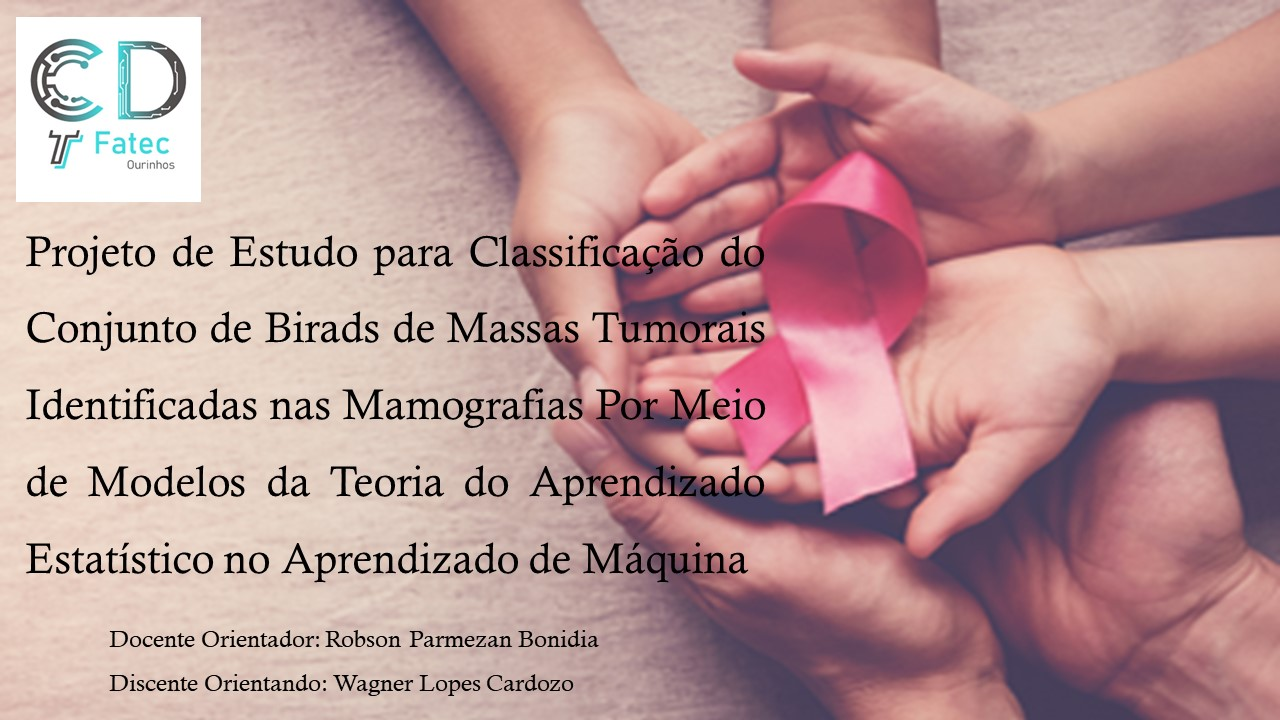

#<font color=hotpink>Breve Introdução, Objetivo e Metodologia Deste Projeto
<font color=hotpink>O Birads (Breast Imaging-Reporting and Data System) é uma padronização internacional criada pelo ACR - Colégio Americano de Radiologia de classificação do laudo final de exames de mamografia, permitindo assim a interpretação e classificação do achado patológico (carcinoma de mama), norteando assim, a correta prescrição da terapia para a paciente.

<font color=hotpink>Então, este Projeto de Estudo, tem por objetivo, fazendo uso de Modelos Matemáticos do Aprendizado Estatístico no Aprendizado de Máquina, classificar a classe de saída sendo do grupo de risco ou não sendo do grupo de risco, para o Birads, analisando os atributos de entrada: idade, forma, margem, densidade e gravidade, numa base de dados com essas informações, de massas tumorais observadas em exames de mamografia.

<font color=hotpink>Os classificadores da Teoria do Aprendizado Estatístico Utilizados neste Projeto de Estudo Foram: Árvore de Decisão, Floresta Randômica, Máquina de Suporte Vetor SVM, Naive Bayes, Regressão Logística, K-Nearest Neighbor KNN e Rede Neural Artificial ANN, sendo utilizado como método de avaliação da acurácia para cada classificador o método da curva ROC (Receiver Operating Characteristic) ou, Curva Característica de Operação do Receptor, que é uma representação gráfica que mostra o desempenho de um classificador binário, à medida que o seu limiar de discriminação varia, relacionando a sensibilidade (verdadeiro positivo) no eixo y com a especificidade (verdadeiro negativo) no eixo x para cada valor encontrado na base de dados.

#<font color=hotpink>Exemplo de curva ROC

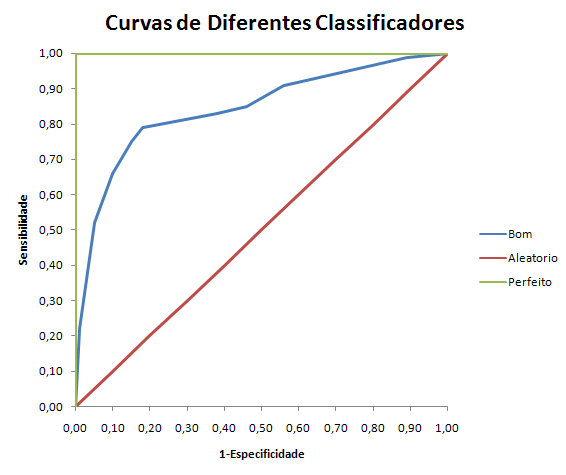

#<font color=hotpink>Descrição dos Atributos de Entrada da Base de Dados

<font color=hotpink>* <font color=hotpink>Idade - do paciente em anos

<font color=hotpink>* <font color=hotpink>forma de massa - redondo=1 oval=2 lobular=3 irregular=4

<font color=hotpink>* margem da massa: circunscrita=1 microlobulada=2 obscurecida=3 mal definida=4 espiculada=5

<font color=hotpink>* densidade de massa - alta=1 iso=2 baixa=3 contendo gordura=4

<font color=hotpink>* Gravidade - benigno=0 ou maligno=1

#<font color=hotpink>Fonte da Base de Dados

<font color=hotpink>Os dados foram retirados de um arquivo no formato .TXT fornecidos no repositório: UCI Machine Learning Repository - Center for Machine Learning and Intelligent Systems (Mammographic Mass Data Set)

<font color=hotpink>Link - https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

#<font color=hotpink>Instanciando os módulos da biblioteca Sklearn-Learn e demais bibliotecas Pandas, NumPy e MatPlotLib da Linguagem de Programação Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#<font color=hotpink>Carregando a base de dados "mammography_masses_data.txt" e visualizando as primeiras 20 linhas

In [ ]:
# Input dataset into a dataframe

input_file = '/content/mammographic_masses.data.txt'
masses_data = pd.read_csv(input_file, names = ['BI-RADS','Age','Shape','Margin','Density','Severity'], usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(20)

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


#<font color=hotpink>Obtendo uma breve descrição estatística dos atributos (colunas da tabela) da base de dados

In [ ]:
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


#<font color=hotpink>Tratando a base de dados descartando os exemplos (linhas da tabela) com valores nulos mas poderíamos também substituir esses valores nulos por valores médios da mesma coluna, optamos em descartar

In [ ]:
# Podemos eliminar os valores núlos das colunas da tabela
masses_data = masses_data.dropna()

# Ou colocar nos campos nulos valores da média dos demais valores presentes na mesma coluna

# for column in masses_data.columns:
#     masses_data[column] = masses_data[column].replace(0, np.NaN)
#     mean = int(masses_data[column].mean(skipna=True))
#     masses_data[column] = masses_data[column].replace(np.NaN, mean)

masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


#<font color=hotpink>Criando os eixos X e Y as features e labels

In [ ]:
# X sendo as 4 primeiras colunas e y sendo a coluna gravidade (grupo de risco)

features = list(masses_data.columns[:4])
X = masses_data[features].values
print('features:%s' %features)

labels = list(masses_data.columns[4:])
y = masses_data[labels].values
y = y.ravel()
print('labels:%s' %labels)

features:['Age', 'Shape', 'Margin', 'Density']
labels:['Severity']


#<font color=hotpink>Normalizando os dados que transformados terão valor médio 0 e desvio padrão 1

In [ ]:
# Recursos de entrada para normalizar os dados

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.76580356  0.17445989  1.39563127  0.24031298]
 [ 0.15166622  0.97988304  1.39563127  0.24031298]
 [-1.89545824 -1.43638642 -1.15892729  0.24031298]
 ...
 [ 0.56109111  0.97988304  1.39563127  0.24031298]
 [ 0.69756608  0.97988304  1.39563127  0.24031298]
 [ 0.42461615  0.17445989  0.11835199  0.24031298]]


#<font color=hotpink>Separando a base de dados em base para treino e base para teste

#<font color=hotpink>

In [ ]:
# Criando base de treino e teste

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

#<font color=hotpink>Usando o classificador Árvore de Decisão

In [ ]:
# Classificador de árvore de decisão do modelo usando o conjunto de treinamento

dtc = tree.DecisionTreeClassifier(random_state=0)

# Ajuste do modelo
dtc = dtc.fit(X_train, y_train)

# Prever os valores do conjunto de teste

y_pred = dtc.predict(X_test)
print(y_pred)

# Calculando a precisão da previsão - usando a função score() é usada diretamente para fazer este cálculo no formato defout
# dando um resultado de 77% com parâmetros defout

print(dtc.score(X_test, y_test))

# Agrupamos os resultados em um novo dicionário e assim por diante, para cada classificador, para depois comparar no final,
# então, inicializamos a lista de dicionários (cada dicionário conterá um rótulo de modelo com os resultados e precisão previstos)
models=[]

model = {}
model['label'] = 'Decision Tree'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0]
0.7740384615384616


#<font color=hotpink>Construindo a curva ROC

In [ ]:
from sklearn import metrics

# Função que cria a curva ROC e usamos a medida Características Operacionais do Receptor (Receiver Operating Characteristic - ROC),
# para avaliar a qualidade de saída do classificador usando validação cruzada

def createROC(y_test, y_pred):


    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f%%'% (roc_auc*100))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')

    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.show()

#<font color=hotpink>Exibindo o comportamento da curva ROC:
<font color=hotpink>O conceito de AUC (Area Under the Cuve) Área Sobre a Curva é uma área sobre a curva ROC, melhor disendo, seria os pontos que formam a curva ROC, ou seja, a derivada da curva ROC, onde varia entre 0,0 e 1,0 e, quanto maior for o AUC, melhor é a capacidade do classificador em prever a categoria correta.

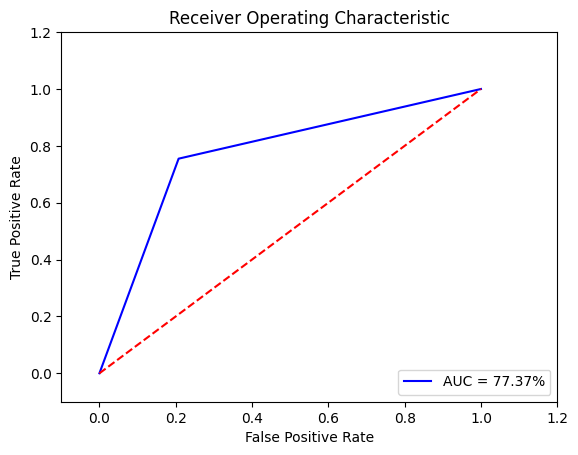

In [ ]:
createROC(y_test, y_pred)

#<font color=hotpink>Usando a validação cruzada K-Fold Cross Validation para validar o modelo de classificador Árvore de Decisão

In [ ]:
# K-Fold Cross Validation: Uma das estratégias de validação cruzada é chamar a função auxiliar cross_val_score no estimador e no
# conjunto de dados, neste modelo, vamos estimar a precisão da Árvore de Decisão dividindo os dados, ajustando o modelo e compilando cv=10
# vezes consecutivas, (com divisões diferentes cada time). A validação cruzada k-Fold, divide todas as amostras em k grupos 'folds'.
# A função de previsão é aprendida usando dobras (k-1), e a dobra restante é usada para teste

dtc = tree.DecisionTreeClassifier(random_state=0)

# A função cross_val_score() avalia a pontuação usando o método de validação, para evitar qualquer tipo de overfitting
scores = model_selection.cross_val_score(dtc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.71428571 0.74698795 0.71084337 0.75903614 0.77108434 0.69879518
 0.73493976 0.74698795 0.75903614 0.6746988 ]
Accuracy: 0.73 (+/- 0.06)


#<font color=hotpink>Usando o classificador Floresta Randômica

In [ ]:
# Construindo o modelo de classificação Floresta Randômica

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

# Ajustando o modelo
rfc = rfc.fit(X_train, y_train)

# Prevendo o resultado
y_pred = rfc.predict(X_test)

# Avaliando a precisão na predição no conjunto de teste
scores = model_selection.cross_val_score(rfc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'Random Forest'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.71428571 0.78313253 0.79518072 0.77108434 0.80722892 0.6746988
 0.74698795 0.77108434 0.77108434 0.71084337]
Accuracy: 0.75 (+/- 0.08)


#<font color=hotpink>Exibindo o comportamento da curva ROC

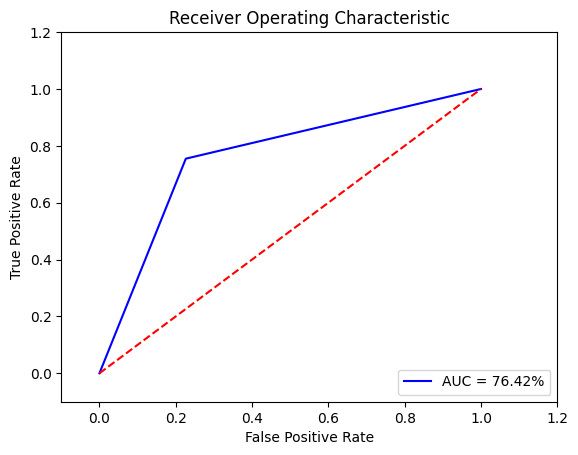

In [ ]:
createROC(y_test, y_pred)

#<font color=hotpink>Utilizando o classificador Máquina de Suporte Vetor SVM

In [ ]:
from sklearn import svm

# Construindo o modelo de classificação SVM
svc = svm.SVC(kernel='linear', C=1, gamma='scale')

# Ajustando o modelo
svc = svc.fit(X_train, y_train)

# Prevendo o resultado
y_pred = svc.predict(X_test)

# Avaliando a precisão na predição no conjunto de teste
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'SVM - Linear Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.71428571 0.78313253 0.84337349 0.80722892 0.84337349 0.73493976
 0.79518072 0.81927711 0.87951807 0.77108434]
Accuracy: 0.80 (+/- 0.10)


#<font color=hotpink>Exibindo o comportamento da curva ROC

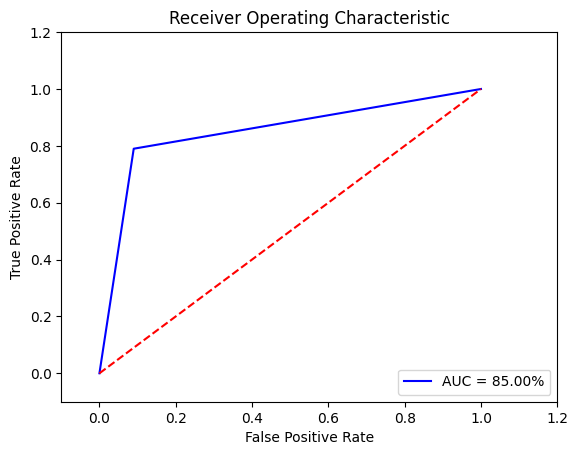

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador SVM-Poly Kernel

In [ ]:
# Construindo o modelo de classificação SVM Poly Kernel
svc = svm.SVC(kernel='poly', C=1, gamma='scale')

# Ajustando o modelo
svc = svc.fit(X_train, y_train)

# Prevendo o resultado
y_pred = svc.predict(X_test)

# Avaliando a precisão na predição no conjunto de teste
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'SVM - Poly Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.76190476 0.78313253 0.85542169 0.80722892 0.81927711 0.73493976
 0.74698795 0.79518072 0.84337349 0.74698795]
Accuracy: 0.79 (+/- 0.08)


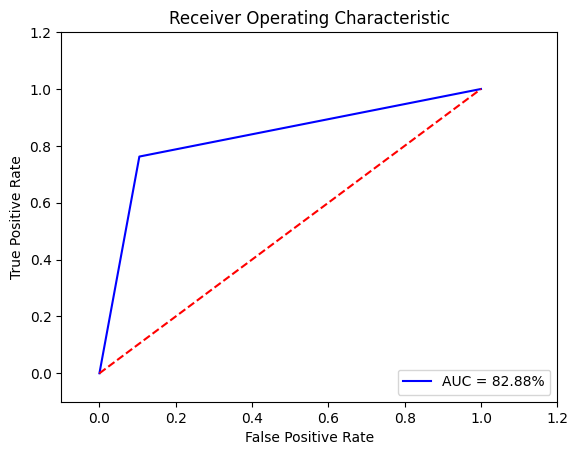

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador SVM-RBF Kernel

In [ ]:
# Construindo o modelo de classificação SVM-RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Ajustando o modelo
svc = svc.fit(X_train, y_train)

# Prevendo o resultado
y_pred = svc.predict(X_test)

# Avaliando a precisão na predição no conjunto de teste
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'SVM - RBF Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.76190476 0.80722892 0.84337349 0.81927711 0.85542169 0.74698795
 0.75903614 0.78313253 0.85542169 0.77108434]
Accuracy: 0.80 (+/- 0.08)


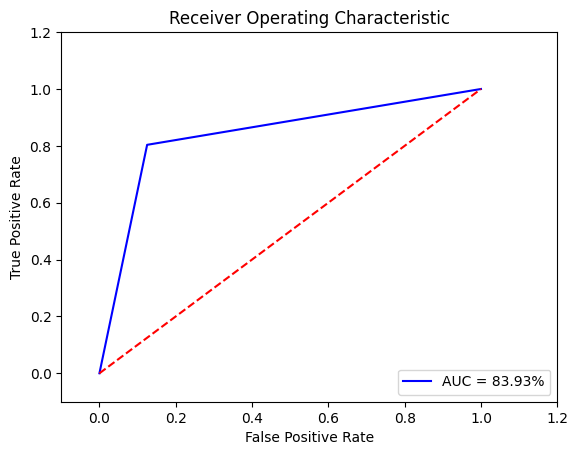

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador SVM-Sigmoid

In [ ]:
# Construindo o modelo de classificação SVM-Sigmoid
svc = svm.SVC(kernel='sigmoid', C=1, gamma='scale')

# Ajustando o modelo
svc = svc.fit(X_train, y_train)

# Prevendo o resultado
y_pred = svc.predict(X_test)

# Avaliando a precisão na predição no conjunto de teste
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'SVM - Sigmoid Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.67857143 0.68674699 0.77108434 0.72289157 0.73493976 0.72289157
 0.80722892 0.73493976 0.71084337 0.79518072]
Accuracy: 0.74 (+/- 0.08)


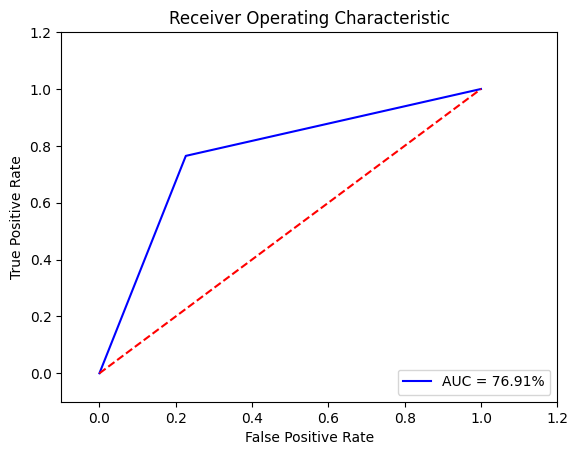

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB


#  Escalando os recursos de entrada para normalizar os dados dentro de um determinado intervalo
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Construindo o modelo Naive Bayes
nb = MultinomialNB()

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

# Ajustando o modelo
nb.fit(X_train, y_train)

# Prevendo o resultado
y_pred = nb.predict(X_test)

# Calculando a precisão da previsão usando score()
nb.score(X_test, y_test)

# Avalia a precisão da predição no conjunto de teste usando validação cruzada
scores = model_selection.cross_val_score(nb, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'Naive Bayes'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.73809524 0.77108434 0.79518072 0.8313253  0.8313253  0.77108434
 0.71084337 0.75903614 0.89156627 0.71084337]
Accuracy: 0.78 (+/- 0.11)


#<font color=hotpink>Exibindo o comportamento da curva ROC

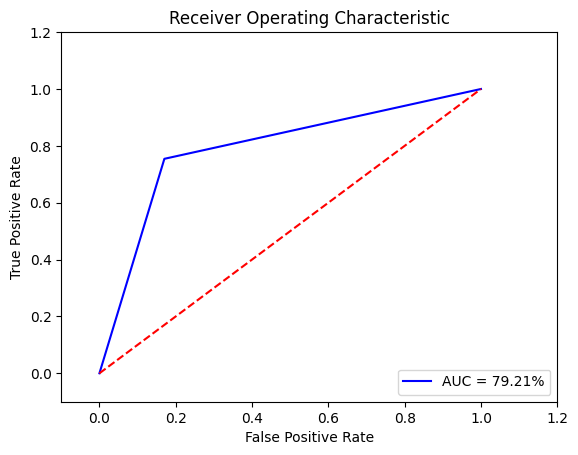

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador Regressão Logística

In [ ]:
from sklearn import linear_model

# Construindo o modelo Regressão Logística
lr = linear_model.LogisticRegression(C=1e5, solver='lbfgs')

# Ajustando o modelo
lr = lr.fit(X_train, y_train)

# Prevendo o resultado
y_pred = lr.predict(X_test)

# Avaliando a precisão de nossa predição no conjunto de teste
scores = model_selection.cross_val_score(lr, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'Logistic Regression'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.75       0.77108434 0.85542169 0.81927711 0.81927711 0.73493976
 0.79518072 0.81927711 0.87951807 0.79518072]
Accuracy: 0.80 (+/- 0.08)


#<font color=hotpink>Exibindo o comportamento da curva ROC

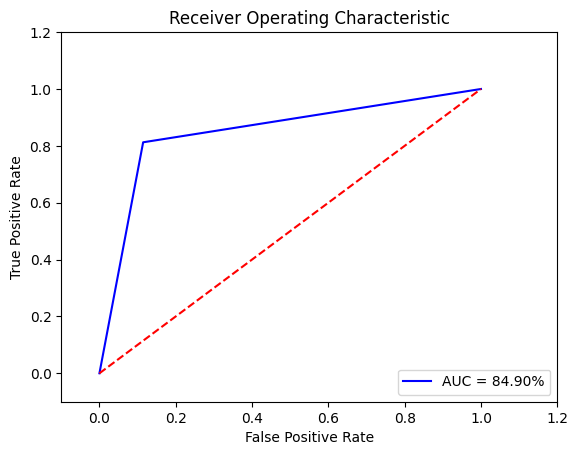

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador KNN - K-Nearest Neighbor com medida Euclidiana

In [ ]:
# Dimensionando recursos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Definindo o modelo

# da função math.sqrt(len(y_test)) = 14.42, porém não queremos um número par '14' para nossos vizinhos votarem, então,
# escolhemos um número próximo, escolhendo '13', e p, é o parâmetro de potência para definir a medida usada que é a euclidian
knn = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')

# Ajustando o modelo
knn.fit(X_train, y_train)

# Predizendo o resultado
y_pred = knn.predict(X_test)

# Avaliando a precisão de nossa predição no conjunto de teste
scores = model_selection.cross_val_score(knn, X, y, cv=10)
print(scores)
# A pontuação média e o intervalo de confiança de 95% da estimativa de pontuação
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'KNN - K-Nearest Neighbor'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.71428571 0.78313253 0.80722892 0.77108434 0.86746988 0.72289157
 0.79518072 0.77108434 0.85542169 0.73493976]
Accuracy: 0.78 (+/- 0.10)


#<font color=hotpink>Exibindo o comportamento da curva ROC

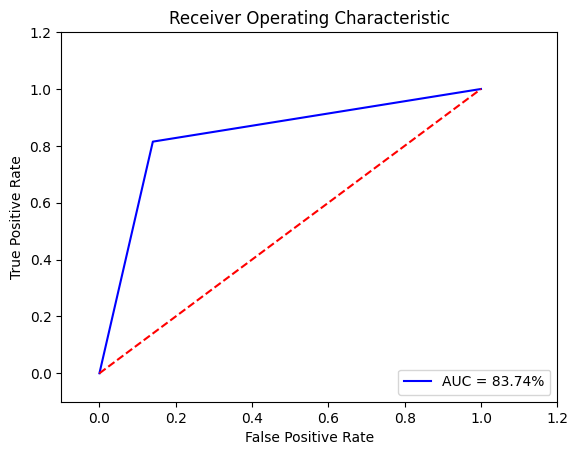

In [ ]:
createROC(y_pred, y_test)

#<font color=hotpink>Usando o classificador ANN Rede Neural Artificial

In [ ]:
# Instanciando a biblioteca Keras para Montar a Rede Neural Artificial

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Escolhendo os parâmetros para montagem da Rede Neural Artificial

ann = Sequential()

ann.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(64, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(32, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(16, kernel_initializer='normal', activation='relu'))
ann.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=10, epochs=200, verbose=2)

Epoch 1/200
63/63 - 1s - loss: 0.6885 - accuracy: 0.6148 - 1s/epoch - 20ms/step
Epoch 2/200
63/63 - 0s - loss: 0.5623 - accuracy: 0.7929 - 111ms/epoch - 2ms/step
Epoch 3/200
63/63 - 0s - loss: 0.4775 - accuracy: 0.7897 - 116ms/epoch - 2ms/step
Epoch 4/200
63/63 - 0s - loss: 0.4776 - accuracy: 0.7897 - 104ms/epoch - 2ms/step
Epoch 5/200
63/63 - 0s - loss: 0.4689 - accuracy: 0.7929 - 114ms/epoch - 2ms/step
Epoch 6/200
63/63 - 0s - loss: 0.4643 - accuracy: 0.7929 - 101ms/epoch - 2ms/step
Epoch 7/200
63/63 - 0s - loss: 0.4543 - accuracy: 0.7913 - 104ms/epoch - 2ms/step
Epoch 8/200
63/63 - 0s - loss: 0.4612 - accuracy: 0.7913 - 104ms/epoch - 2ms/step
Epoch 9/200
63/63 - 0s - loss: 0.4534 - accuracy: 0.7961 - 108ms/epoch - 2ms/step
Epoch 10/200
63/63 - 0s - loss: 0.4629 - accuracy: 0.8074 - 107ms/epoch - 2ms/step
Epoch 11/200
63/63 - 0s - loss: 0.4554 - accuracy: 0.7945 - 109ms/epoch - 2ms/step
Epoch 12/200
63/63 - 0s - loss: 0.4563 - accuracy: 0.8026 - 110ms/epoch - 2ms/step
Epoch 13/200
63

#<font color=hotpink>Resultado da acuracia e perda da rede neural, conforme podede ser observado na curva ROC da Rede Neural Artificial

In [ ]:
# Avaliando a precisão de nossa predição no conjunto de teste
score = ann.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Predizendo o resultado
y_pred = ann.predict(X_test)

# Adicionando os resultados a um novo dicionário para comparar no final
model = {}
model['label'] = 'ANN - Artificial Neural Network'
model['pred'] = y_pred
model['acc'] = metrics.roc_auc_score(y_test, y_pred) # Pontuação da exatidão(y_test, y_pred)

models.append(model)
#print(models)

Test Loss: 0.49750739336013794
Test Accuracy: 0.8269230723381042
7/7 [==============================] - 0s 2ms/step


#<font color=hotpink>Exibindo o comportamento da curva ROC

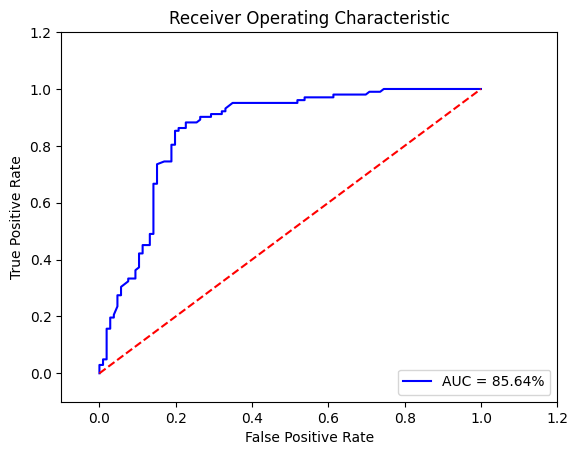

In [ ]:
createROC(y_test, y_pred)

#<font color=hotpink>Exibindo a curva ROC com a comparação do desempenho de todos os classificadores usados neste Projeto de Estudo

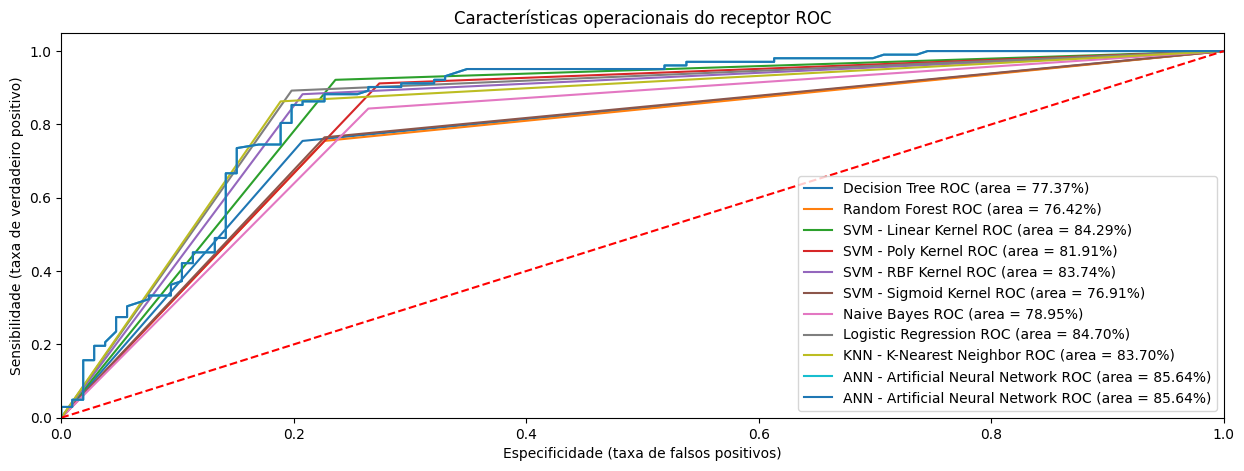

In [ ]:
# Criando gráficos para comparação de todos os classificadores deste estudo

# Curva ROC para todos os classificadores

plt.figure(figsize = (15, 5))

for m in models:
    mod = m['label']
    y_pred = m['pred']
    # Calculando a taxa de falsos positivos e a taxa de verdadeiros positivos
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    # Calculando a precisão da curva a ser exibida no gráfico
    auc = metrics.auc(fpr, tpr) # metrics.roc_auc_score(y_test, y_pred)
    # Plotando os valores calculados
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f%%)' % (m['label'], auc*100))
# Criando configurações personalizadas para o gráfico
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidade (taxa de falsos positivos)')
plt.ylabel('Sensibilidade (taxa de verdadeiro positivo)')
plt.title('Características operacionais do receptor ROC')
plt.legend(loc="lower right")
# Exibindo o gráfico ROC com todas as curvas de todos os classificadores
plt.show()

#<font color=hotpink>Conclusões

#<font color=hotpink>Podemos concluir com este Projeto de Estudo que o melhor classificador foi a Rede Neural artificial ANN com 85,64 % de acurácia seguido respectivamente dos classificadores Regressão Logística com acurácia de 84,70 %, Máquina de Suporte Vetor com 84,29 %, KNN com 83,70 %, Naive Bayes com 78,95 %, Árvore de Decisão com 77,37 % e Floresta Randômica com 76,42.

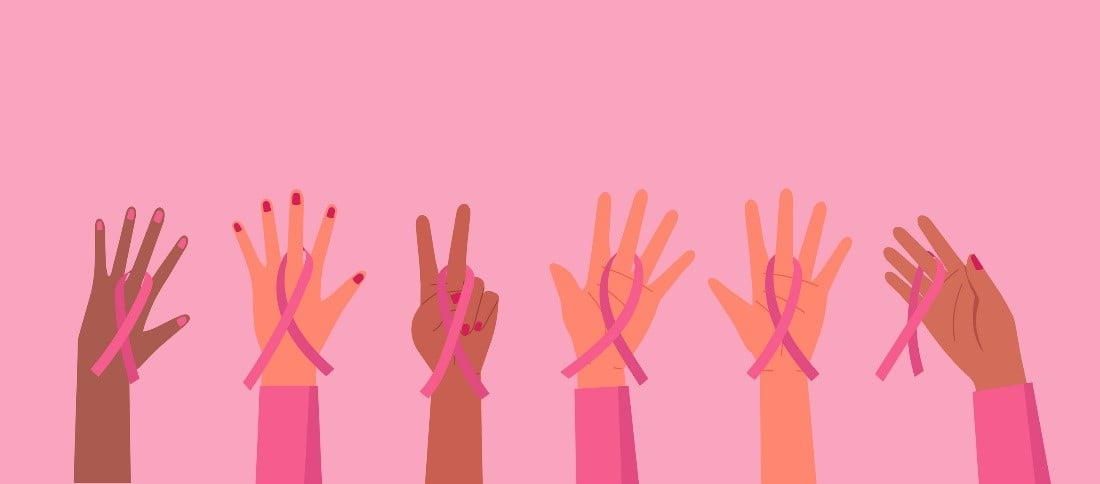